In [1]:
import os
import pandas
import numpy as np
import matplotlib.pyplot as plt
import datetime

def plot_ts_scatter(df, s = 75, figsize = (40, 20), save_fig = False, pp = None):
    # Create plot for every unique pair of variables
    plot_vars = list(df.keys())
    for var1 in plot_vars:
        for var2 in plot_vars:
            if var1 != var2:
                fig, ax = plt.subplots(figsize = figsize)
                # Create list of years from index
                # Year will be represented by color
                if "Year" not in df.keys():
                    df["Year"] = [int(str(ind)[:4]) for ind in df.index] 
                df.plot.scatter(x = var1, y = var2, s = s, ax = ax, 
                                c = "Year", cmap = "viridis")
                # Turn the text on the x-axis so that it reads vertically
                ax.tick_params(axis='x', rotation=90)
                # Get rid of tick lines perpendicular to the axis for aesthetic
                ax.tick_params('both', length=0, which='both')
                # save image if PdfPages object was passed
                if save_fig:
                    try:
                        os.mkdir("plots")
                    except:
                        pass
                    plt.savefig("plots/" + str(plot_vars).replace("[", "").replace("]","")[:40] + " scatter.png",
                            bbox_inches = "tight")
                    if pp != None: pp.savefig(fig, bbox_inches = "tight")

In [2]:
#FRED.py
import pandas as pd
import pandas_datareader.data as web
import datetime

def gather_data(data_codes, start, 
                end = datetime.datetime.today(), freq = "A"):
    i = 0
    # dct.items() calls key and value that key points to
    for key, val in data_codes.items():
        if i == 0:
            # Create dataframe for first variable, then rename column
            df = web.DataReader(val, "fred", start, end).resample(freq).mean()
            df.rename(columns = {val:key}, inplace = True) 
            # setting i to None will cause the next block of code to execute,
            # placing data within df instead of creating a new dataframe for
            # each variable
            i = None
        else:
            # If dataframe already exists, add new column
            df[key] = web.DataReader(val, "fred", start, end).resample(freq).mean()

    return df

In [3]:
#from datlib.stats import *
from datlib.plots import * 
from datlib.FRED import *
data_codes  = {"Gross Domestic Product": "FYGDP",
               "Federal Debt: Total Public Debt as Percent of Gross Domestic Product": "GFDEGDQ188S",
              "Federal Surplus or Deficit [-]": "FYFSD"}
# Select start and end dates
start = datetime.datetime(1950, 7, 1)
end = datetime.datetime.today()

# freq refers to data frequency. Choose "D", "W", "M", "Q", "A"
# a number may also be place in front of a letter. "2D" indicates
#       alternating days
data = gather_data(data_codes = data_codes, start = start, end = end, freq = "A")

In [4]:
def bil_to_mil(series):
    return series* 10**3

all of the data sets are related in a few different ways. they all depend on public wealth. and they all depend on the strength of the dollar

/Users/shoo/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/shoo/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/shoo/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/shoo/opt/anaconda3/lib/python3.7/site-packages/pandas/plot

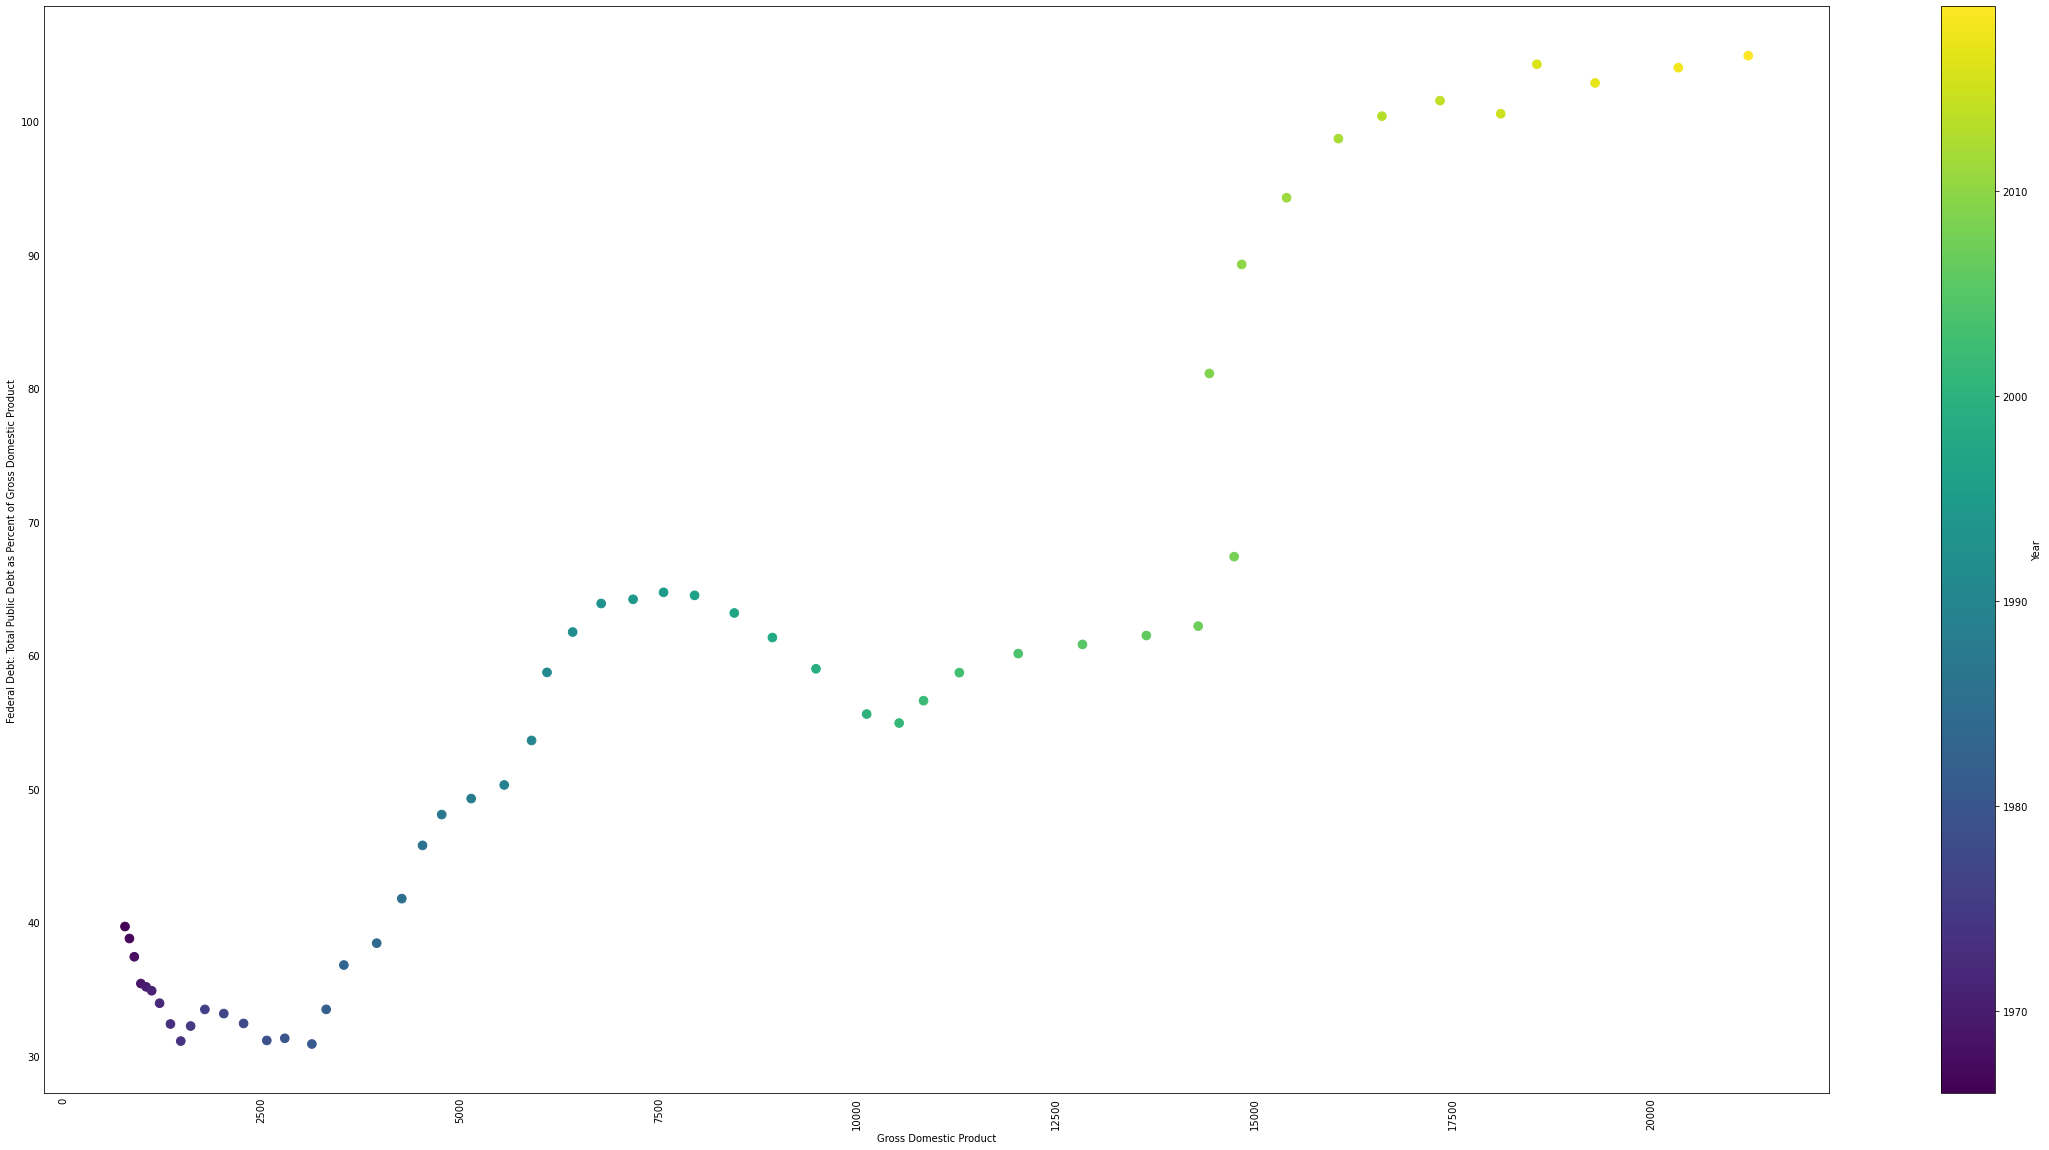

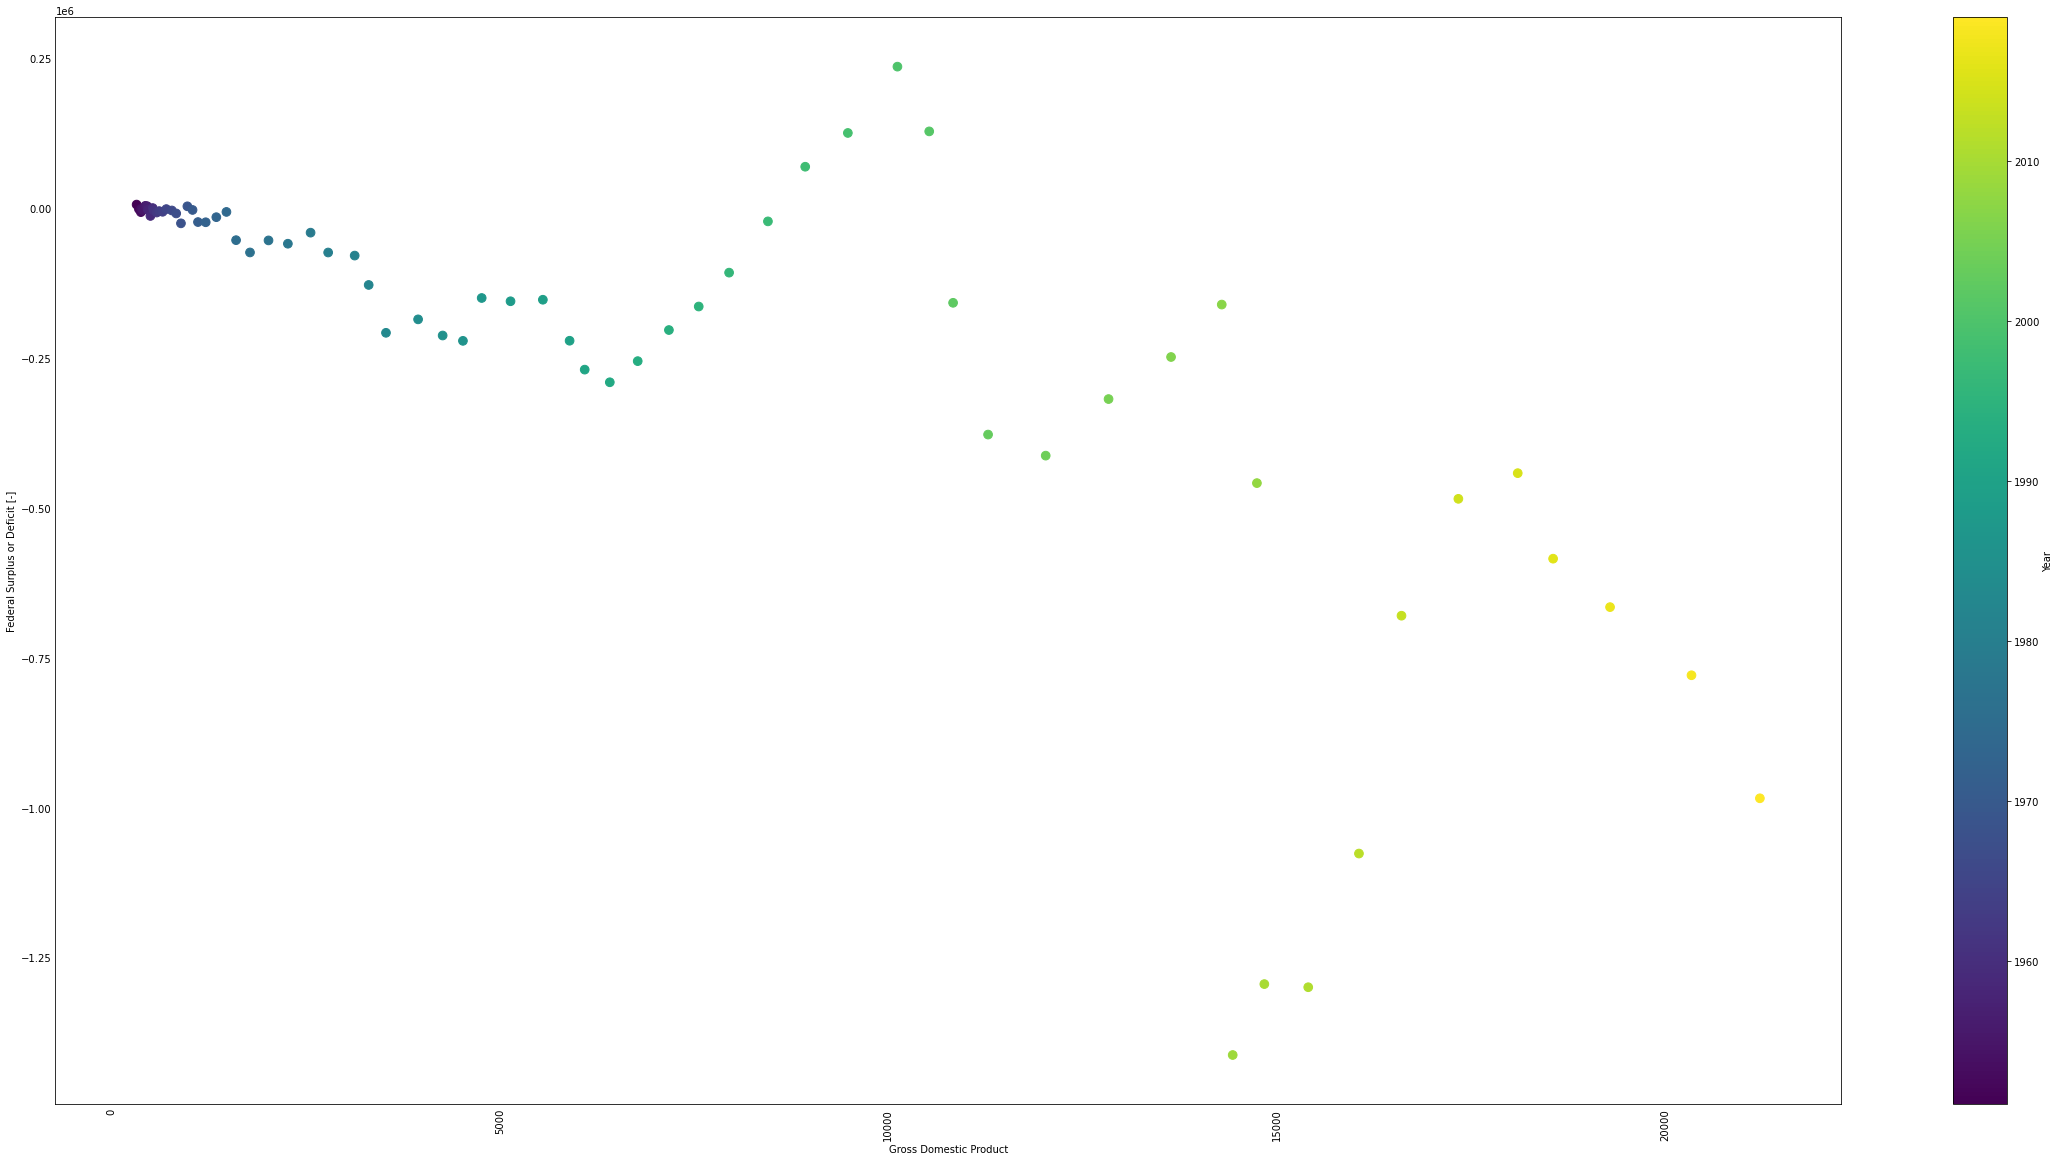

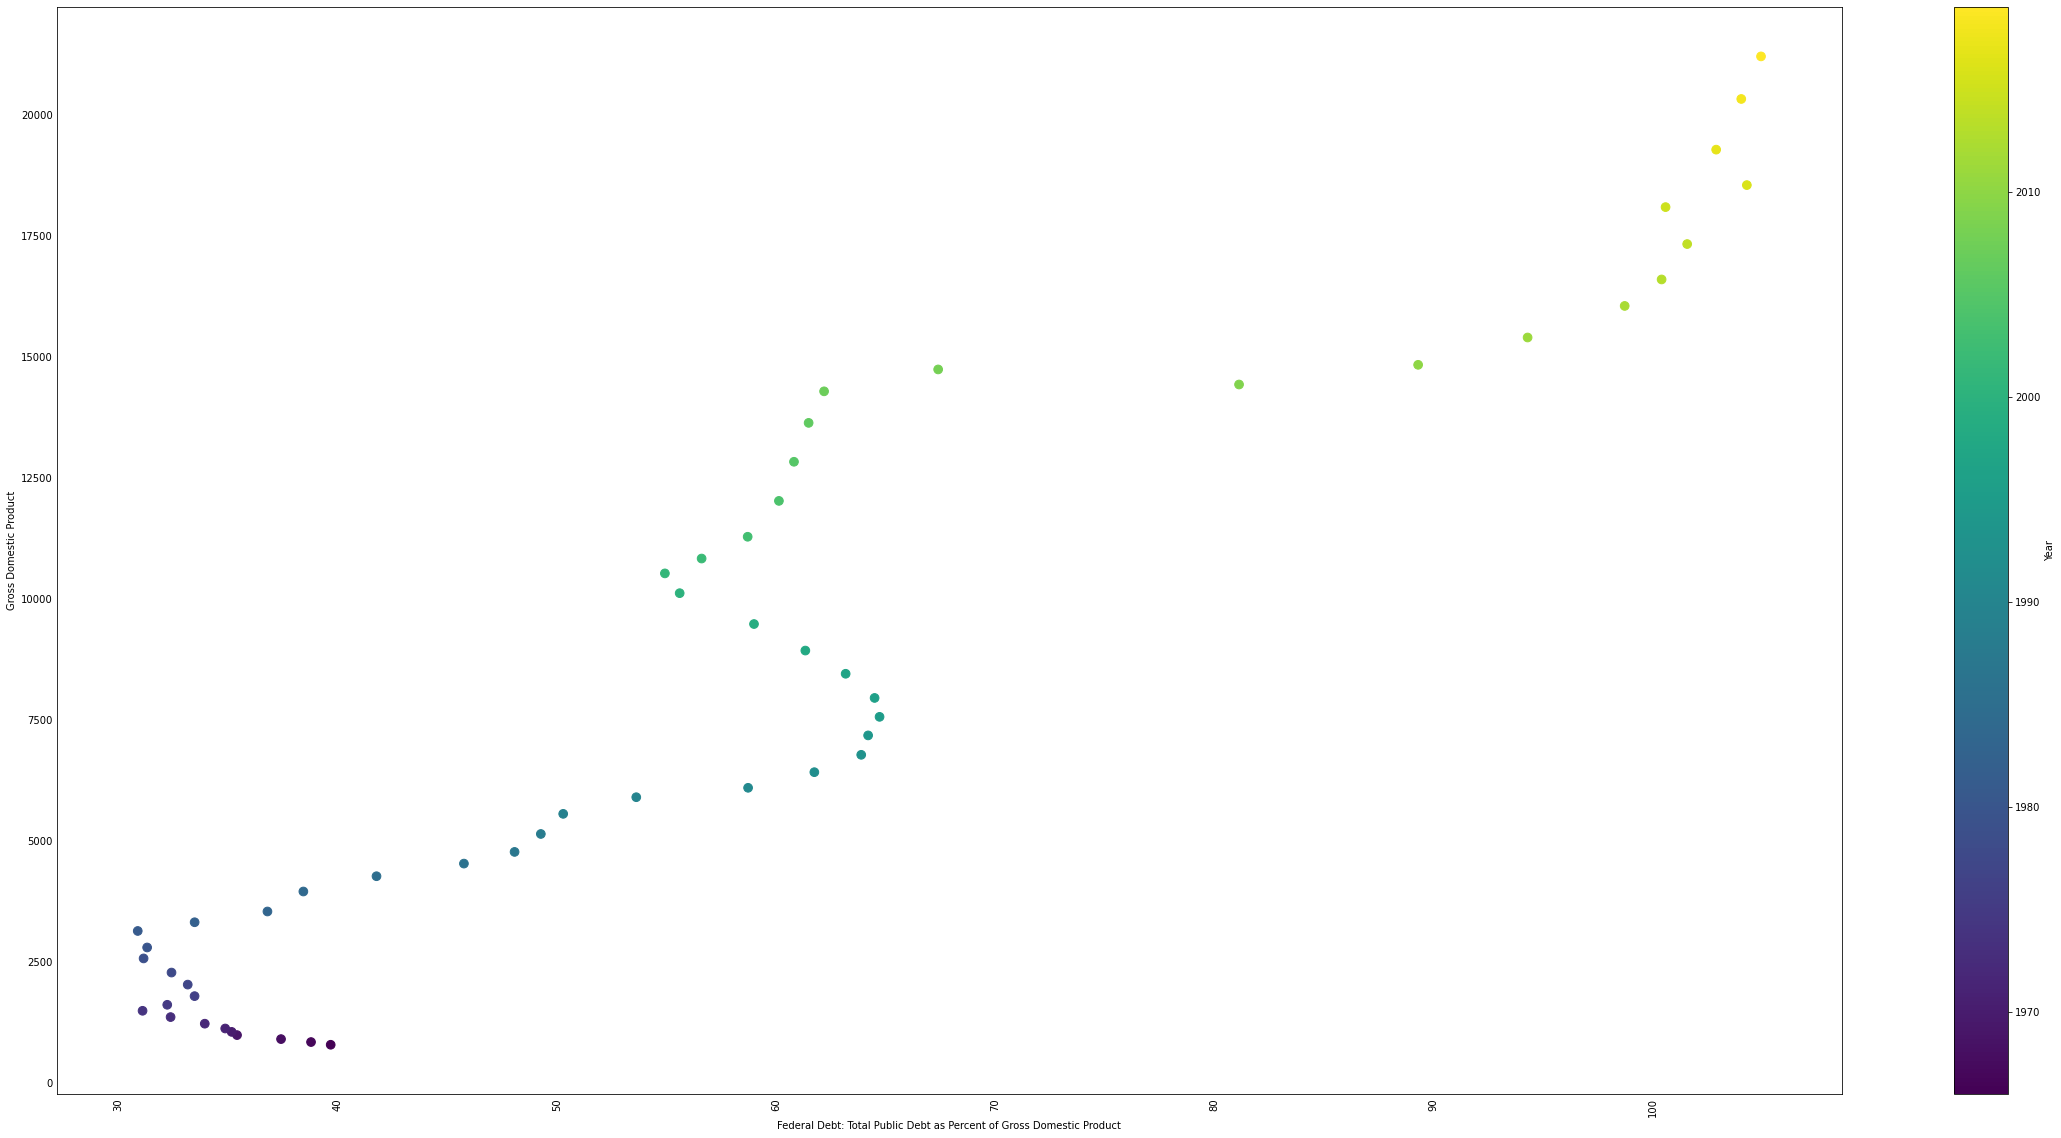

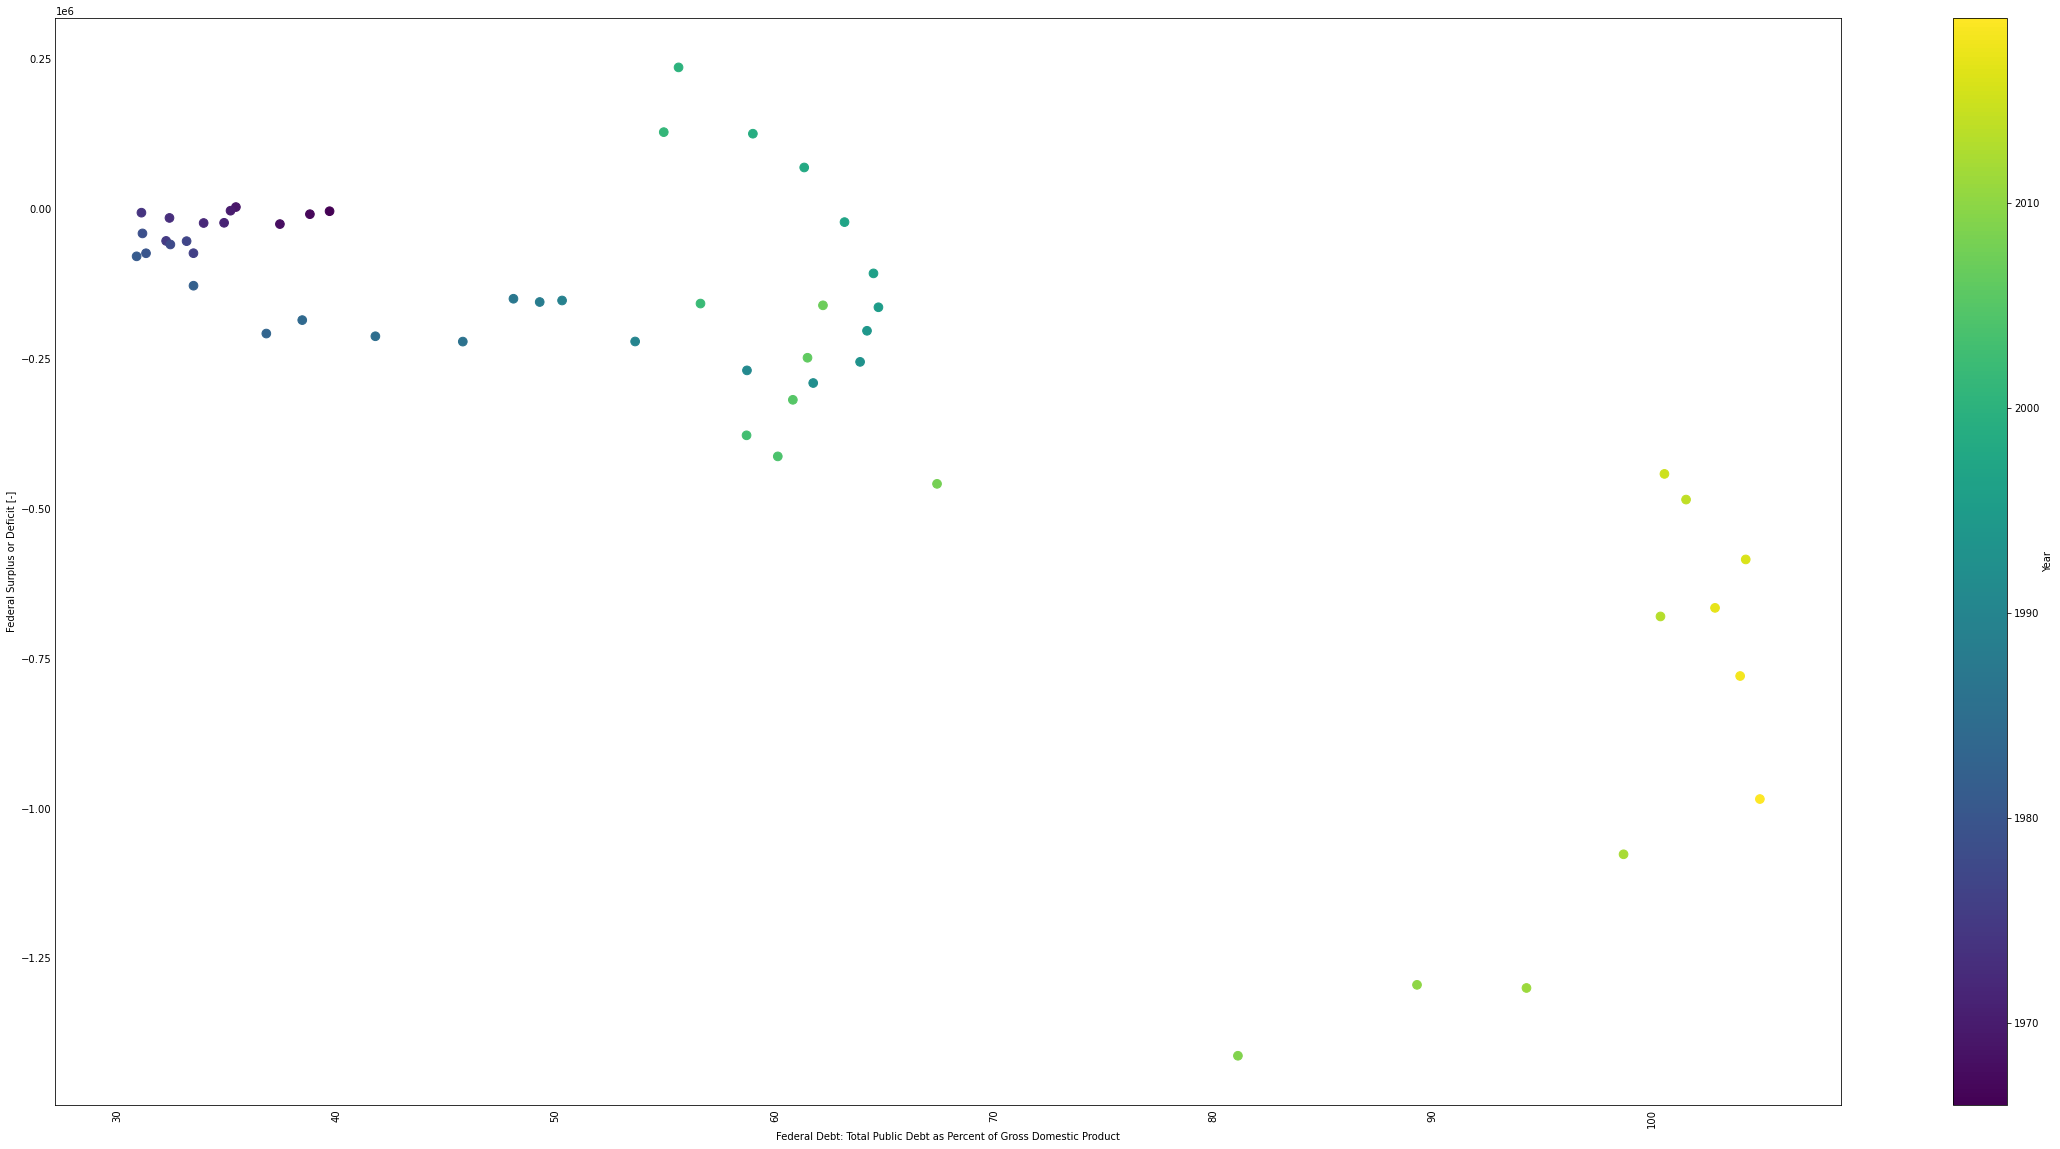

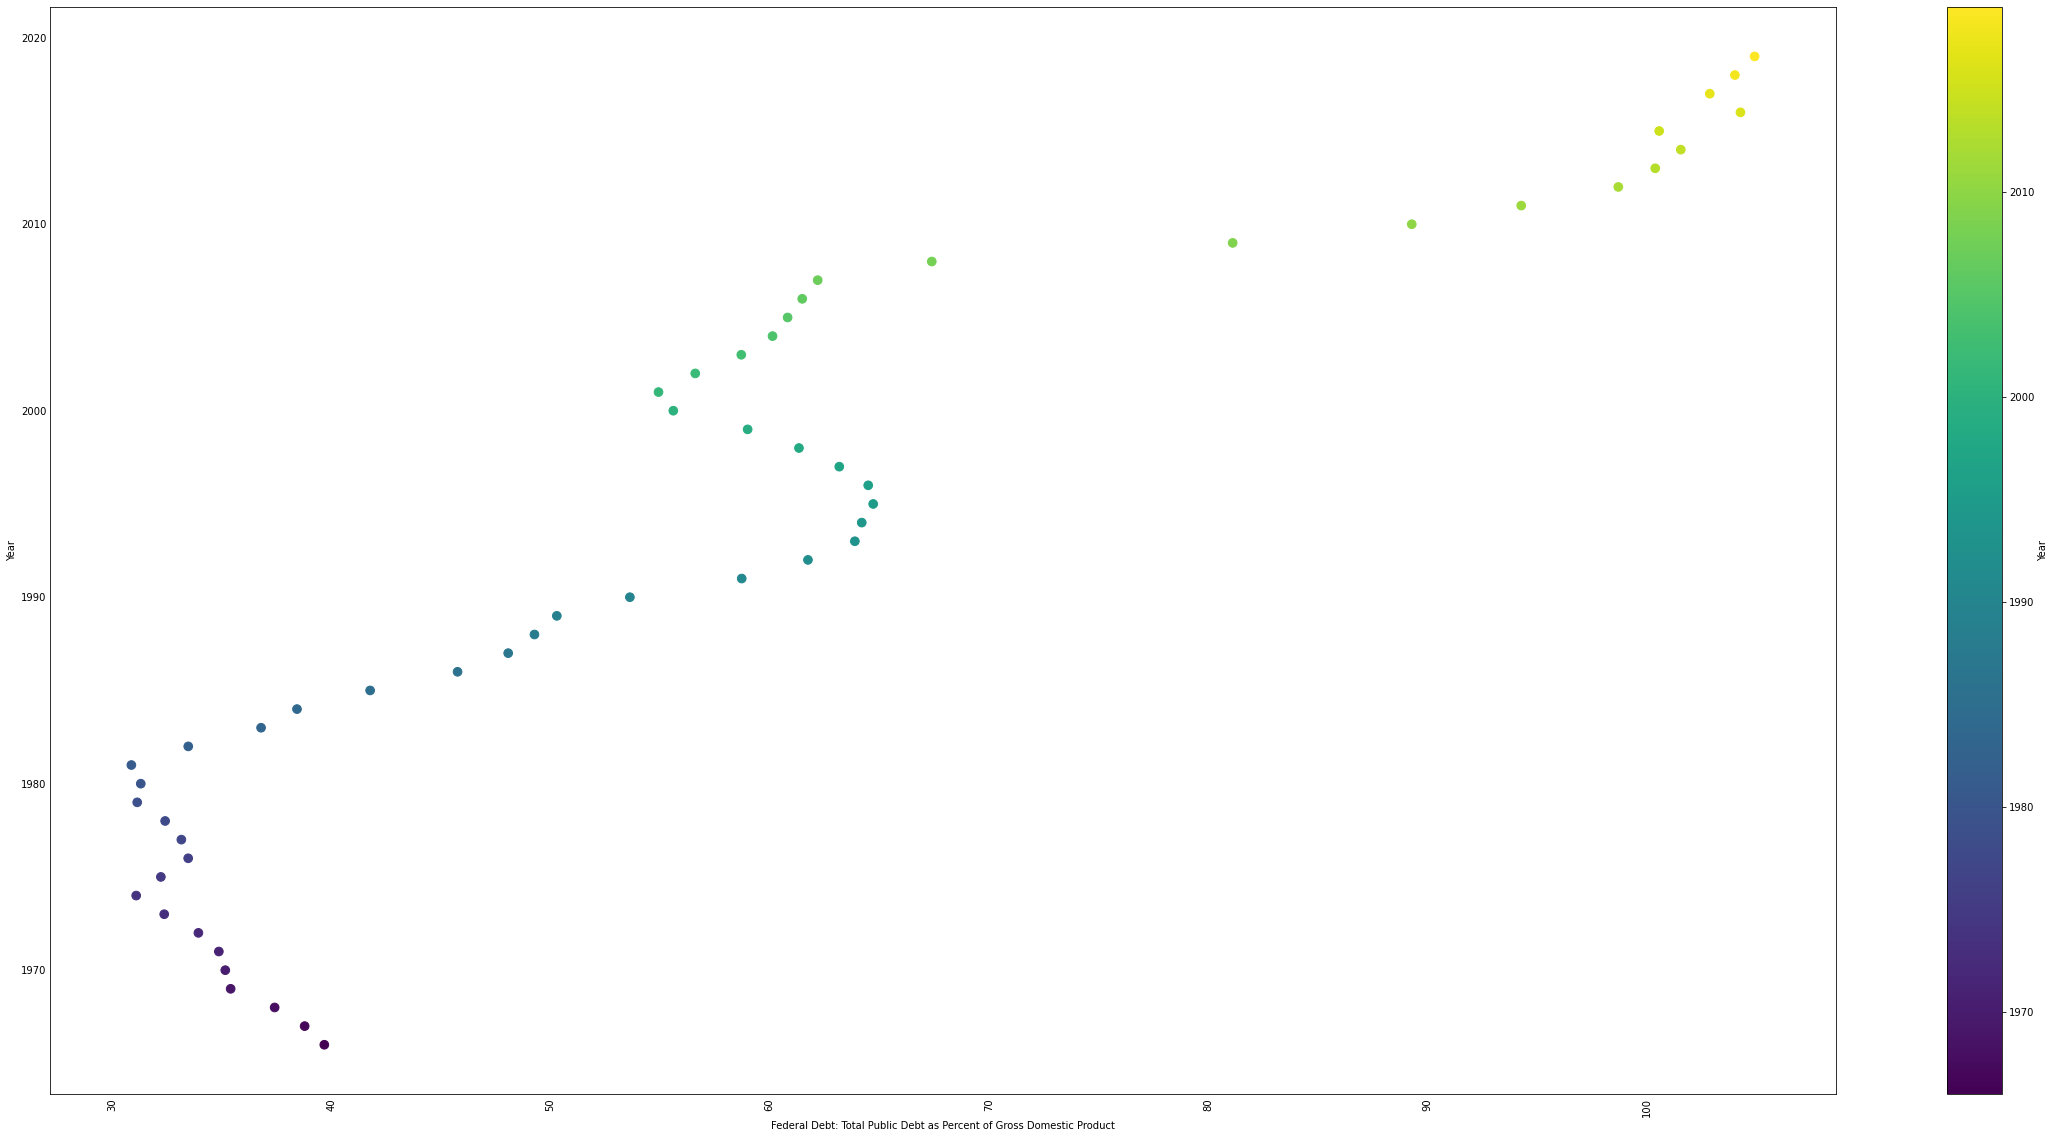

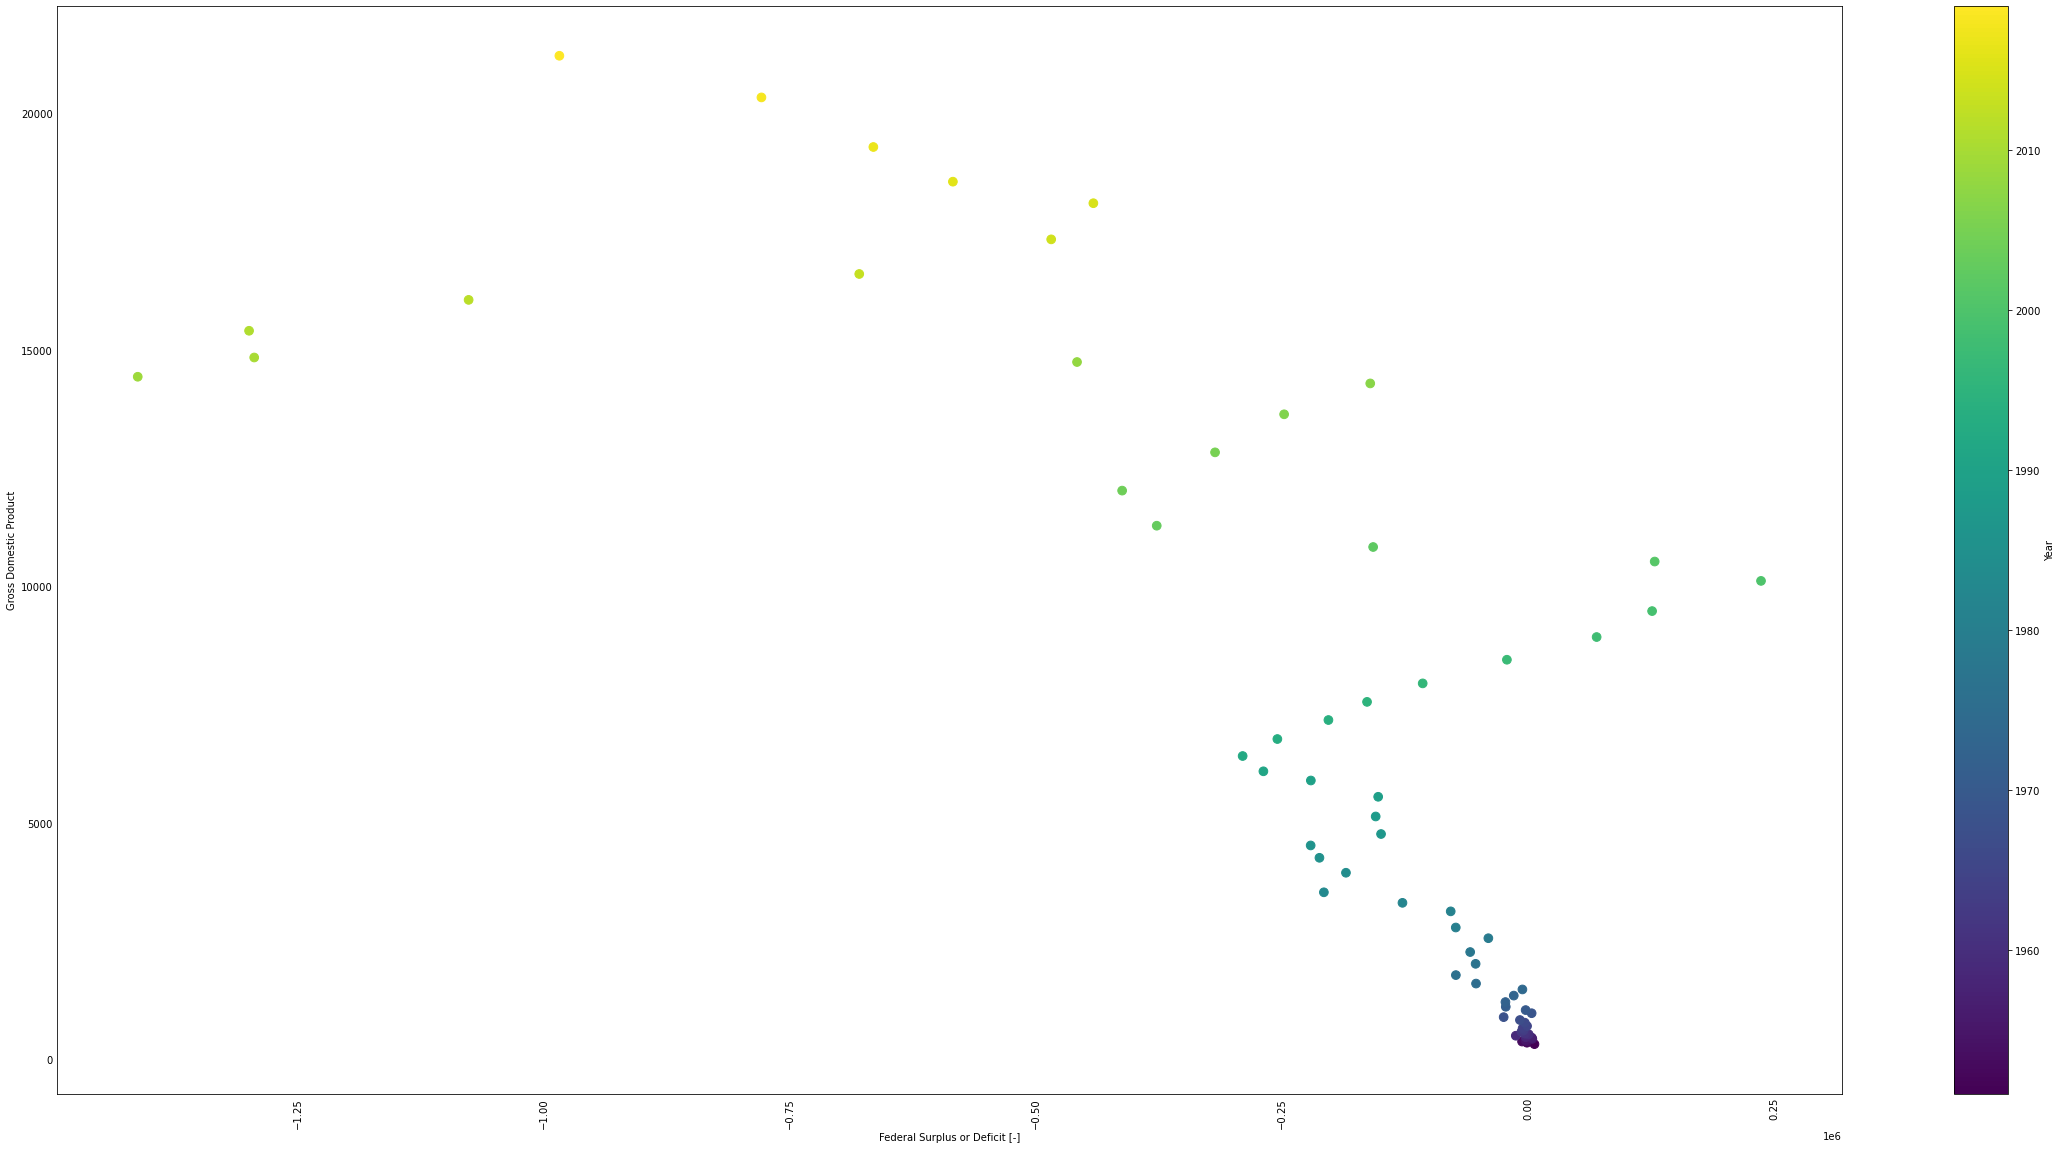

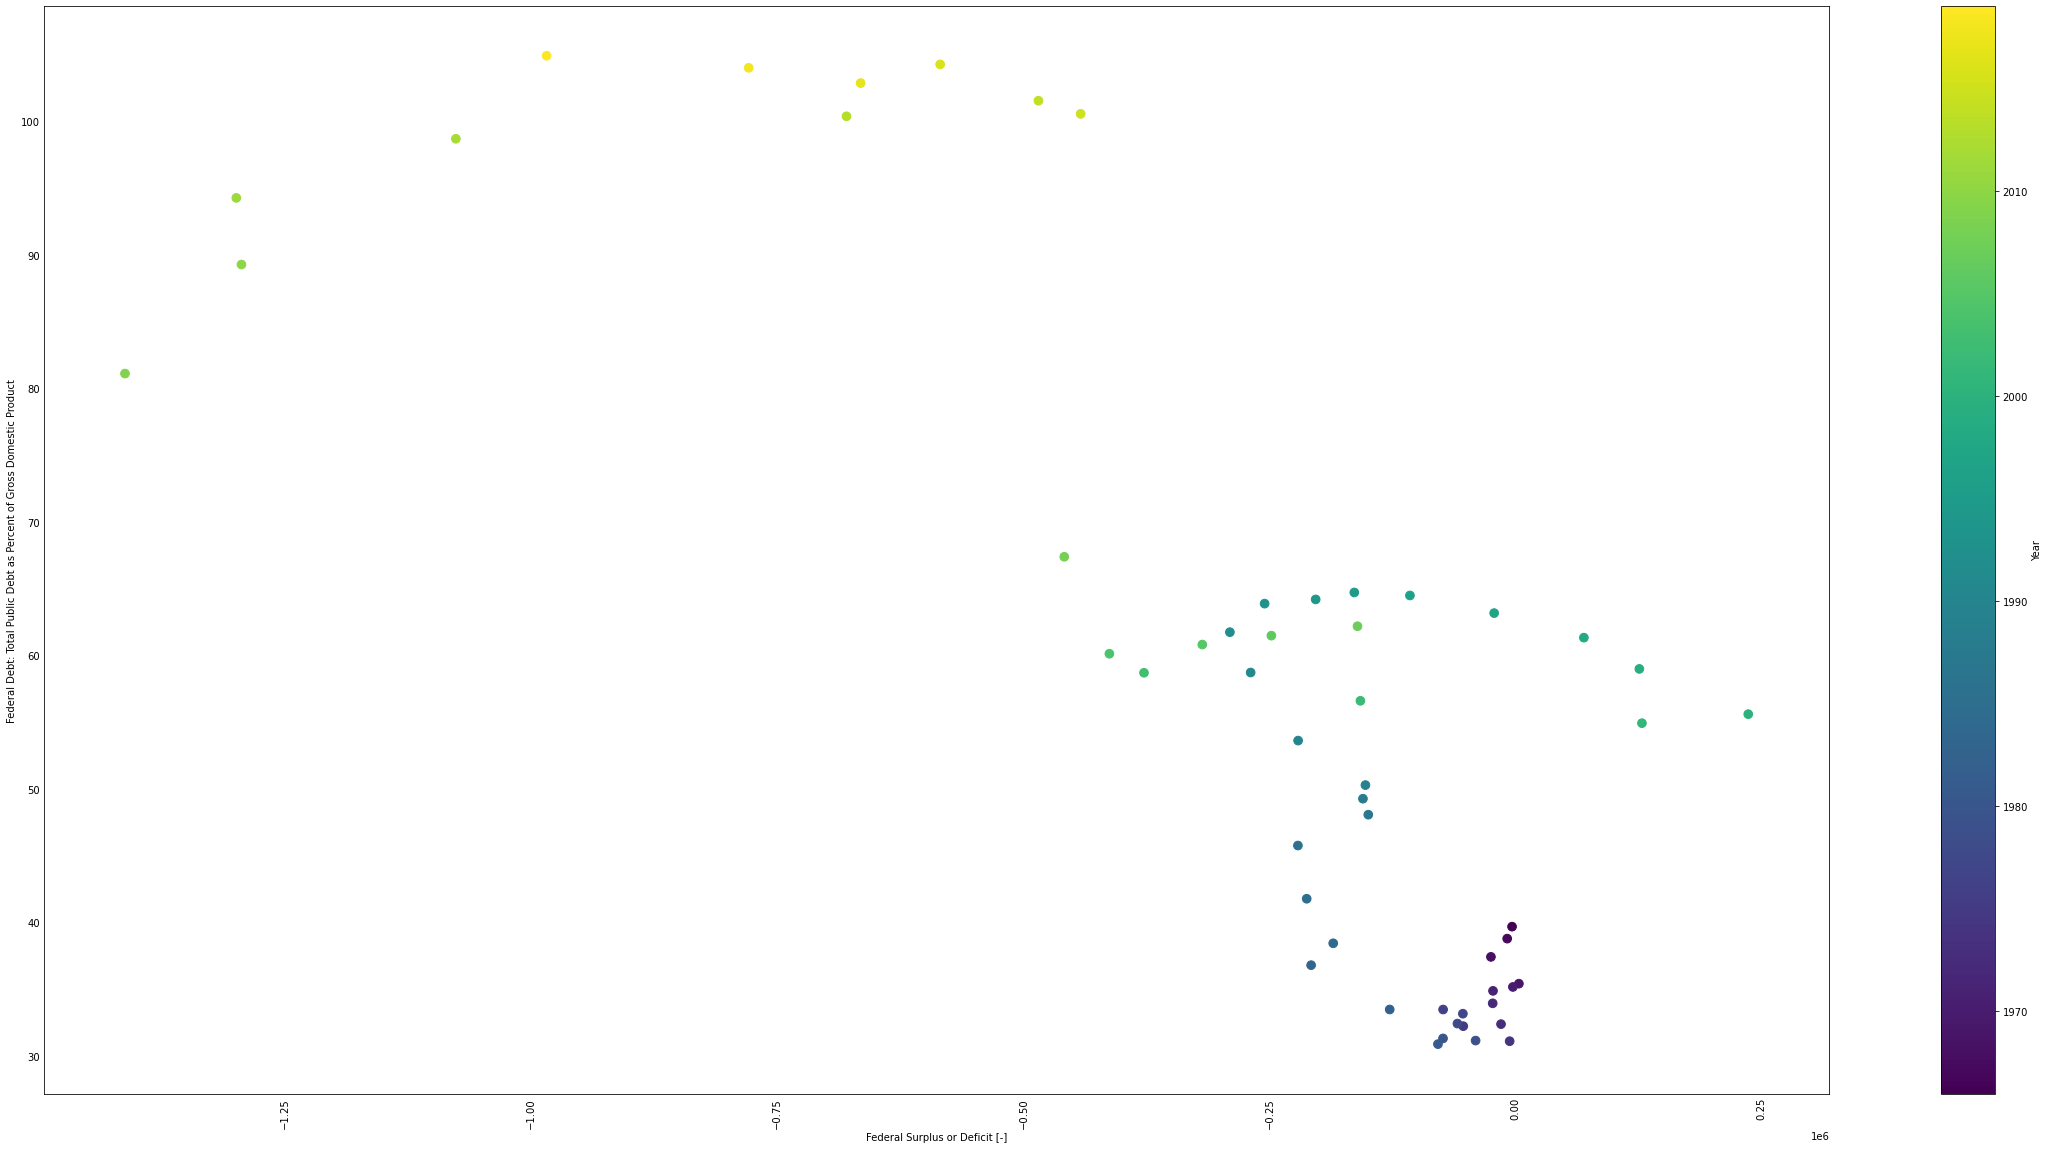

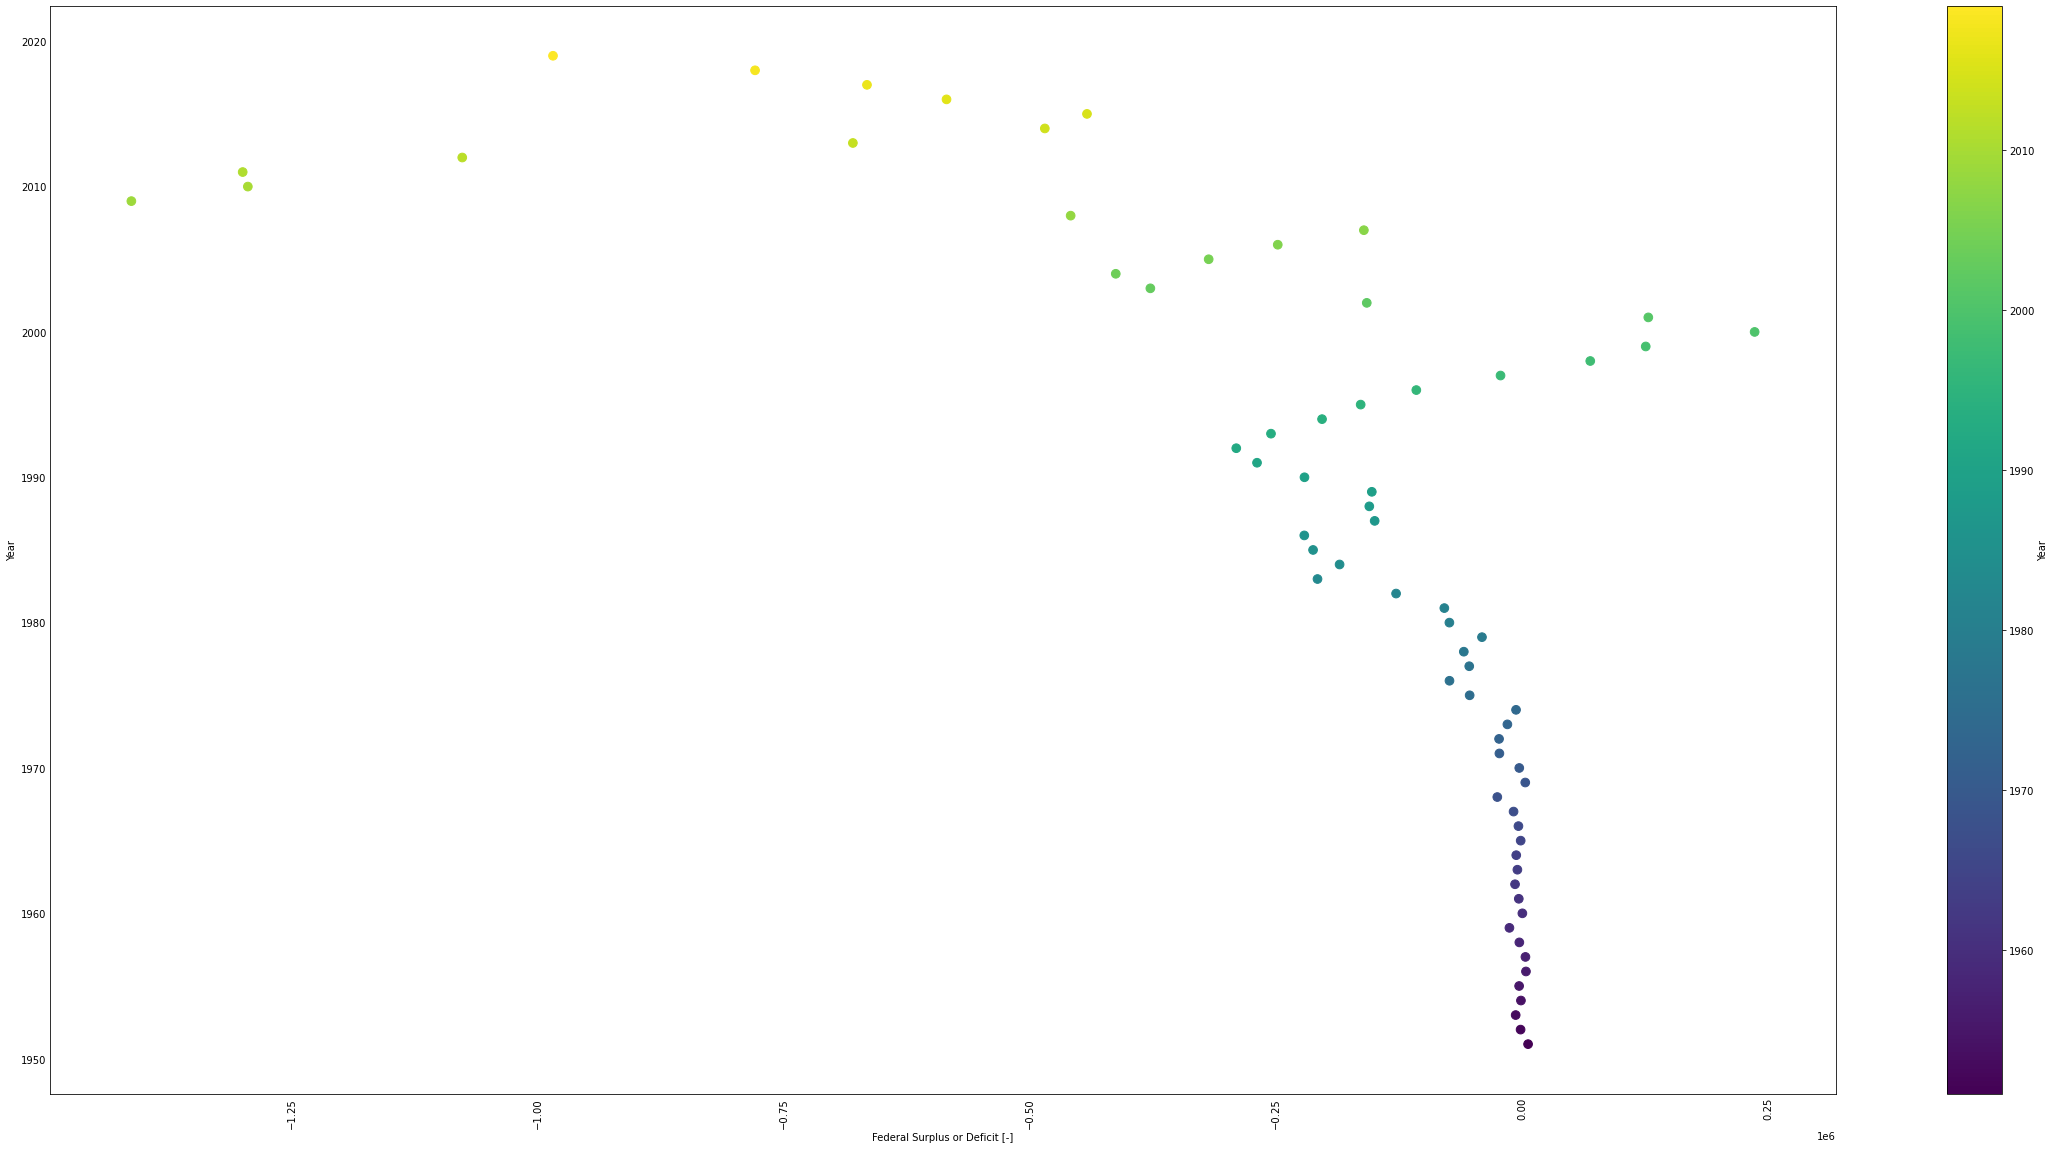

In [5]:
scatter_vars = ["Gross Domestic Product", "Federal Debt: Total Public Debt as Percent of Gross Domestic Product", "Federal Surplus or Deficit [-]"]
plot_ts_scatter(data[scatter_vars])

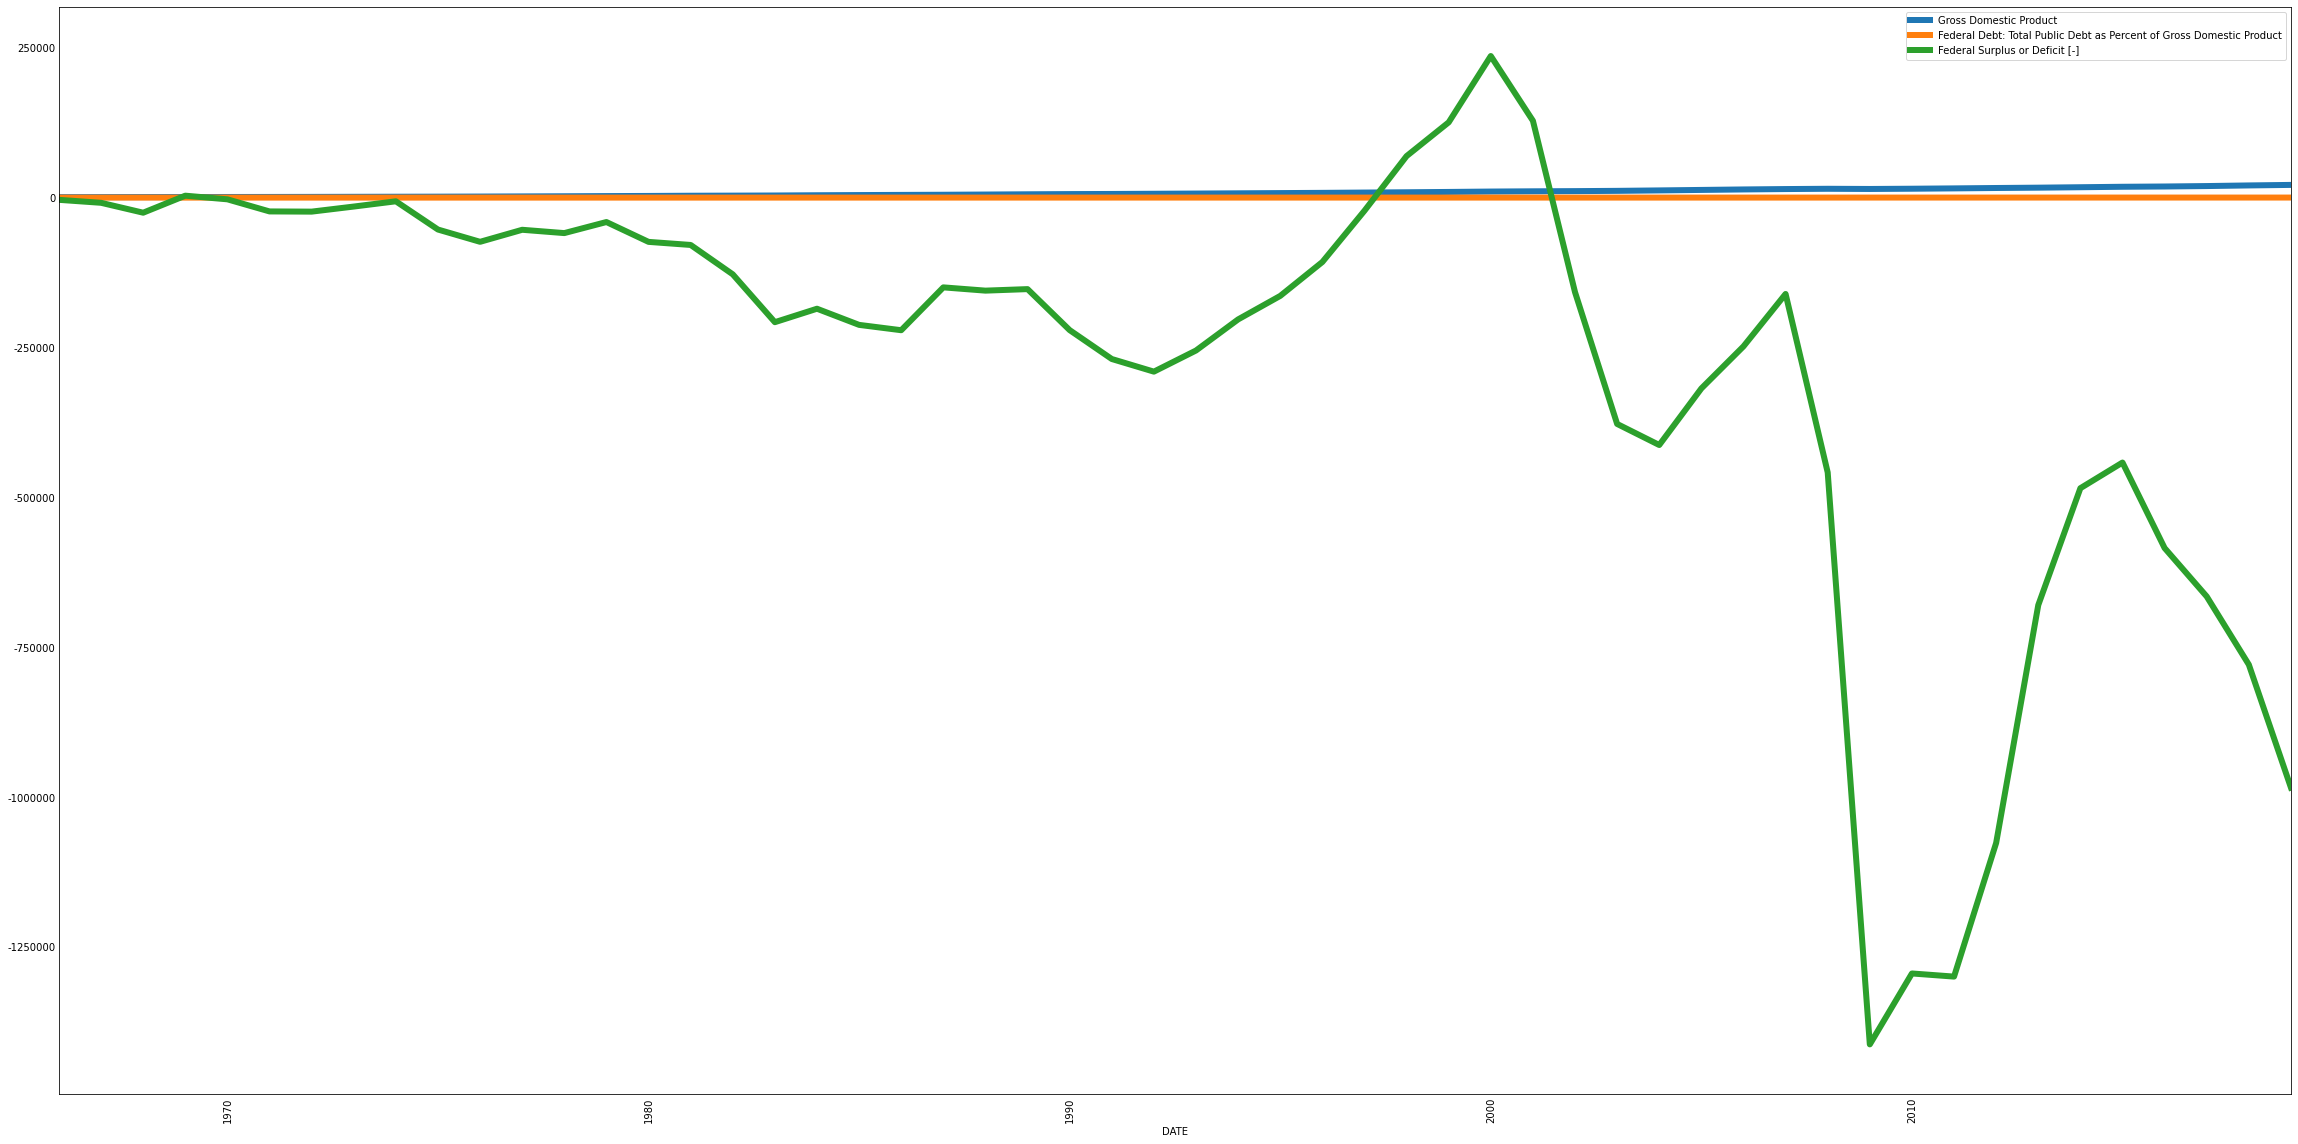

In [6]:
interest_vars = ["Gross Domestic Product", "Federal Debt: Total Public Debt as Percent of Gross Domestic Product", "Federal Surplus or Deficit [-]"]
plot_lines(data[interest_vars], linewidth = 6)

hw part 2

In [7]:
GDP_codes = {"Gross Domestic Product": "GDP",
             "Real Gross Domestic Product": "GDPC1",
             "Consumer Price Index for All Urban Consumers: All Items in U.S. City Average": "CPIAUCSL",
             "Currency in Circulation": "CURRCIR"}

start = datetime.datetime(1980,1, 1)
end = datetime.datetime.today()

GDP_Data = gather_data(GDP_codes,
                  start = start,
                  end = end,
                  freq = "Q").dropna()

GDP_Data

,Gross Domestic Product,Real Gross Domestic Product,Consumer Price Index for All Urban Consumers: All Items in U.S. City Average,Currency in Circulation
DATE,,,,
1980-03-31,2789.842,6837.641,79.033333,122.483667
1980-06-30,2797.352,6696.753,81.700000,125.111667
1980-09-30,2856.483,6688.794,83.233333,129.226667
1980-12-31,2985.557,6813.535,85.566667,133.348667
1981-03-31,3124.206,6947.042,87.933333,133.050667
1981-06-30,3162.532,6895.559,89.766667,136.163667
1981-09-30,3260.609,6978.135,92.266667,139.050333
1981-12-31,3280.818,6902.105,93.766667,141.615000
1982-03-31,3274.302,6794.878,94.600000,142.049667


In [8]:
GDP_codes = {"Gross Domestic Product": "GDP",
             "Real Gross Domestic Product": "GDPC1",
             "Consumer Price Index for All Urban Consumers: All Items in U.S. City Average": "CPIAUCSL",
             "Currency in Circulation": "CURRCIR"}

start = datetime.datetime(1980,1, 1)
end = datetime.datetime.today()

GDP_v = gather_data(GDP_codes,
                  start = start,
                  end = end,
                  freq = "Q").dropna()

GDP_v


,Gross Domestic Product,Real Gross Domestic Product,Consumer Price Index for All Urban Consumers: All Items in U.S. City Average,Currency in Circulation
DATE,,,,
1980-03-31,2789.842,6837.641,79.033333,122.483667
1980-06-30,2797.352,6696.753,81.700000,125.111667
1980-09-30,2856.483,6688.794,83.233333,129.226667
1980-12-31,2985.557,6813.535,85.566667,133.348667
1981-03-31,3124.206,6947.042,87.933333,133.050667
1981-06-30,3162.532,6895.559,89.766667,136.163667
1981-09-30,3260.609,6978.135,92.266667,139.050333
1981-12-31,3280.818,6902.105,93.766667,141.615000
1982-03-31,3274.302,6794.878,94.600000,142.049667


In [9]:
GDP_v.dropna()

,Gross Domestic Product,Real Gross Domestic Product,Consumer Price Index for All Urban Consumers: All Items in U.S. City Average,Currency in Circulation
DATE,,,,
1980-03-31,2789.842,6837.641,79.033333,122.483667
1980-06-30,2797.352,6696.753,81.700000,125.111667
1980-09-30,2856.483,6688.794,83.233333,129.226667
1980-12-31,2985.557,6813.535,85.566667,133.348667
1981-03-31,3124.206,6947.042,87.933333,133.050667
1981-06-30,3162.532,6895.559,89.766667,136.163667
1981-09-30,3260.609,6978.135,92.266667,139.050333
1981-12-31,3280.818,6902.105,93.766667,141.615000
1982-03-31,3274.302,6794.878,94.600000,142.049667


In [10]:
GDP_v["GDP %"] = GDP_v["Gross Domestic Product"].pct_change(4)*100
GDP_v["GDPC1 %"] = GDP_v["Real Gross Domestic Product"].pct_change(4)*100
GDP_v["CPIAUCSL %"] = GDP_v["Consumer Price Index for All Urban Consumers: All Items in U.S. City Average"].pct_change(4)*100
GDP_v["CURRCIR %"] = GDP_v["Currency in Circulation"].pct_change(4)*100
change_v =["GDP %", "GDPC1 %", "CPIAUCSL %", "CURRCIR %"] 

change = round(GDP_v[change_v], 3)
change.dropna()

,GDP %,GDPC1 %,CPIAUCSL %,CURRCIR %
DATE,,,,
1981-03-31,11.985,1.600,11.261,8.627
1981-06-30,13.054,2.969,9.874,8.834
1981-09-30,14.148,4.326,10.853,7.602
1981-12-31,9.890,1.300,9.583,6.199
1982-03-31,4.804,-2.190,7.582,6.764
1982-06-30,5.358,-1.011,6.907,6.992
1982-09-30,3.242,-2.556,5.816,7.359
1982-12-31,3.711,-1.443,4.444,7.879
1983-03-31,6.081,1.431,3.594,8.300


In [11]:
change.dropna().to_csv('file1.csv')

In [12]:
GDP_df = pd.read_csv("file1.csv")
GDP_df.head()

,DATE,GDP %,GDPC1 %,CPIAUCSL %,CURRCIR %
0,1981-03-31,11.985,1.600,11.261,8.627
1,1981-06-30,13.054,2.969,9.874,8.834
2,1981-09-30,14.148,4.326,10.853,7.602
3,1981-12-31,9.890,1.300,9.583,6.199
4,1982-03-31,4.804,-2.190,7.582,6.764


In [14]:
import pandas as pd

data = pd.read_csv("file1.csv", index_col = ["DATE"])
scatter_cats = ["GDP", "GDPC1", "CPIAUCSL",
               "CURRCIR"]
select_data = data[scatter_cats]
select_data

KeyError: "None of [Index(['GDP', 'GDPC1', 'CPIAUCSL', 'CURRCIR'], dtype='object')] are in the [columns]"